In [1]:
import os 
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
def csv_to_df_dict(folder, metric_names=['mean_cer', 'total_loss']):
    
    path_gen = os.walk(os.path.normpath(folder))
    
    df = dict()
    for folder_path, subfolders, files in path_gen: 
        folder_name = os.path.split(folder_path)[-1]
        fullpaths = [os.path.join(folder_path, file) for file in files if '.csv' in file]
        df[folder_name] = dict()
        for metric_name in metric_names:  
            # load metric specific csv files into df dictionary
            for path in fullpaths:
                if metric_name in path:
                    if metric_name not in df[folder_name].keys():
                        df[folder_name][metric_name] = pd.read_csv(path)
                    else:
                        df_shard = pd.read_csv(path)
                        df[folder_name][metric_name] = pd.concat([df[folder_name][metric_name],
                                                                  df_shard], ignore_index=True)
            # rename Value columns to corresponding metric name
            if metric_name in df[folder_name].keys():
                df[folder_name][metric_name].rename(columns={'Value': metric_name},
                                                    inplace=True)
                    
    return df

In [11]:
folder = 'd:/!private/Lord/Git/speech_recognition/private/images/models/01_ff/'
df = csv_to_df_dict(folder)

In [13]:
df['01_ff']['total_loss']

,Wall time,Step,total_loss
0,1.552957e+09,0,9.968479
1,1.552971e+09,1,9.337276
2,1.552984e+09,2,8.300025
3,1.552998e+09,3,7.927019
4,1.553012e+09,4,8.404877
5,1.553026e+09,5,8.174605
6,1.553040e+09,6,7.708029
7,1.553053e+09,7,7.681948
8,1.553067e+09,8,7.147204
9,1.553081e+09,9,7.298861


In [29]:
def plot_and_save_dataframes(df_dict, metric_label_dict, save_folder='results'):
    """
        :param df_dict: dictionary of dictionaries of dataframes (df_dict[folder][metric])
        :param metric_label_dict: mapping of metric_names to title, xlabel and ylabel
        :param save_folder: folder to which the plots will be saved
    """
    for folder, metric_dict in df_dict.items():
        for metric_name, dataframe in metric_dict.items():
            fig = plt.figure()
            plot = dataframe.plot(y=-1,
                                  title=metric_label_dict[metric_name][0],
                                  grid=True)
            plot.set_xlabel(metric_label_dict[metric_name][1])
            plot.set_ylabel(metric_label_dict[metric_name][2])

            full_save_path = os.path.join(os.path.normpath(save_folder),
                                          folder, metric_name + '.pdf')

            os.makedirs(os.path.split(full_save_path)[0], exist_ok=True)

            plt.savefig(full_save_path, transparent=True)
        

<Figure size 432x288 with 0 Axes>

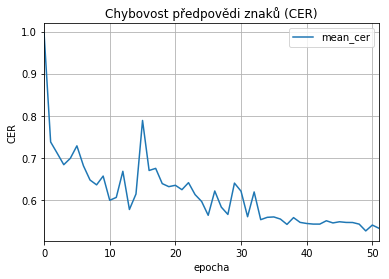

<Figure size 432x288 with 0 Axes>

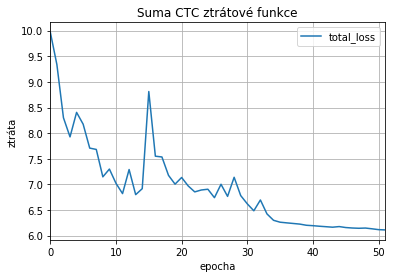

In [30]:
metric_label_dict = {'mean_cer': ('Chybovost předpovědi znaků (CER)', 'epocha', 'CER'),
                     'total_loss': ('Suma CTC ztrátové funkce', 'epocha', 'ztráta')}

plot_and_save_dataframes(df, metric_label_dict)